<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2023/24 Term 2
</div>

# CS105 Group Project Submission (Final)

-----
Provide your team details, including section, team number, team members, and the name of the dataset. 
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.

Include both Part I and Part II to produce a self-contained notebook. You may fine-tune Part I codes and/or findings based on feedback received on Part I submission.
<br>
-----

## Declaration

<span style="color:red">By submitting this notebook, we declare that **no part of this submission is generated by any AI tool**. We understand that AI-generated submissions will be considered as plagiarism, and just like other plagirisum cases, disciplinary actions will be imposed.</span>

#### Section: G1
#### Team: Group 1
#### Members:
1. CHONG SHIH RUI ZACHARY
2. YANG ZHONG HNG REUBEN
3. KEAGAN PAUL POULOSE
4. LUCAS SONG KANGZHENG

#### Dataset: Wine dataset

## Part I: Exploratory Data Analysis (EDA) [8% of final grade]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('wine.csv')

In [3]:
df.head()

,ID,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_SO2,Total_SO2,Density,pH,Sulphates,Alcohol,Quality
0,1,7.0,0.27,0.36,High,0.045,45.0,170.0,>1.00,Acidic,0.45,8%,6
1,2,6.3,0.30,0.34,Low,0.049,14.0,132.0,0.99-1.00,Acidic,0.49,9%,6
2,3,8.1,0.28,0.40,Low,0.050,30.0,97.0,0.99-1.00,Acidic,0.44,10%,6
3,4,7.2,0.23,0.32,Moderate,0.058,47.0,186.0,0.99-1.00,Acidic,0.40,9%,6
4,5,7.2,0.23,0.32,Moderate,0.058,47.0,186.0,0.99-1.00,Acidic,0.40,9%,6


### 1. Overview of dataset [15% of Part I]

**a.** Summarise the background of the dataset [limited to 50 words]

**This dataset gives the quality of wine.
Each row is an observation and represents a type of wine, and along each row, you find values that describe certain attributes about the wine. The Quality variable serves as our target variable that we will be predicting.**

### <font color='red'>Score 3/3 Feedback: Ok</font> 

**b.** State the size of the dataset


In [4]:
n_rows, n_columns = df.shape
print(n_rows)
print(n_columns)
print(df.shape)

4898
13
(4898, 13)


**<h5><font color='green'> [Updated] Edited the above cell per feedback </font></h5>**

### <font color='red'>Score 1/2 Feedback: Next time state number of rows = ?, number of columns = ?, i.e. print / state df.shape</font>

**As shown above, the size of the Wine dataset is 63674** 

**c.** For each variable, describe what it represents and its data type (numerical or categorical)

### <font color='red'>Score 10/10 Feedback: Ok</font> 

|Column name|Description|Data type|
|---|---|---|
|ID| Unique Id of a wine | Categorical |
|Fixed_Acidity| Amount of Tartaric acid, measured in g/dm3 | Numerical |
|Volatile_Acidity| Amount of Acetic acid, measured in g/dm3  | Numerical |
|Citric_Acid| Amount measured in g/dm3 | Numerical |
|Residual_Sugar| Level of residual sugar content | Categorical (“High”, “Moderate”, “Low”) |
|Chlorides| Amount of Sodium chloride, measured in g/dm3 | Numerical |
|Free_SO2| Amount measured in mg/dm3 | Numerical |
|Total_SO2| Amount measured in mg/dm3  | Numerical |
|Density| Amount measured in g/dm3 | Categorical (“<0.99”, “0.99-1.00”, “>1.00”) |
|pH| The measure of acidity of the wine | Categorical (“Neutral”, “Acidic”, “Highly Acidic”)| 
|Sulphates|Potassium sulphate, measured in g/dm3 | Numerical |
|Alcohol| Level of alcohol content | Categorical (8% through 14% in discrete levels)|
|Quality| Score based on sensory data | Categorical (0 through 10 (0 is bad, 10 is good))|

In particular, we take note that the Quality variable, our target, is a categorical variable. This means it cannot be graded on a scale of 1-10 with a float variable type. Each prediction can thus only take fixed values from 0 - 10.

### <font color='red'>Feedback: You can actually represent a categorical variable using numbers. What do you mean by this statement? (anyway this statement is not counted towards describing each variable)</font> 

### 2. Data pre-processing [35% of Part I]

**a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

### <font color='red'>Score 15/15 Feedback: Ok</font> 

In [5]:
n_rows, n_cols = df.shape #Number of rows and columns in wine dataset
(1 - df.count() / n_rows)*100 #Percentage of missing data

ID                  0.000000
Fixed_Acidity       4.450796
Volatile_Acidity    1.020825
Citric_Acid         0.000000
Residual_Sugar      0.000000
Chlorides           0.000000
Free_SO2            0.000000
Total_SO2           0.000000
Density             4.573295
pH                  0.000000
Sulphates           0.000000
Alcohol             0.000000
Quality             0.000000
dtype: float64

|Column name|Percentage of missing data|How to resolve|
|---|---|---|
|ID| 0% | NA |
|Fixed_Acidity| 4.450796% | Less than 5%, so we should impute |
|Volatile_Acidity| 1.020825%  | Less than 5%, so we should impute |
|Citric_Acid| 0% | NA |
|Residual_Sugar| 0% | NA |
|Chlorides| 0% | NA |
|Free_SO2| 0% | NA |
|Total_SO2| 0%  | NA |
|Density| 4.573295% | Less than 5%, so we should impute |
|pH| 0% | NA | 
|Sulphates|0%| NA |
|Alcohol| 0% | NA |
|Quality| 0% | NA |

**Since we are possibly dropping outlier values and the percentage of missing values for each of the respectives columns is <5%, we intend to deal with missing values via imputation. Further, the dataset is small and we do not want to lose too much data by dropping missing values.**

**For Fixed Acidity and Volatile Acidity, mean imputation is preferred as these are numerical variables. For Density, mode imputation is preferred as it is a categorical variable**

In [6]:
# This cell handles the imputation of values for Fixed Acidity, Volatile Acidity and Density columns

fixed_acidity_mean = df.Fixed_Acidity.mean()
volatile_acidity_mean = df.Volatile_Acidity.mean()
density_mode = df.Density.mode()[0]

df.Density.fillna(density_mode, inplace=True)
df.Fixed_Acidity.fillna(fixed_acidity_mean, inplace=True)
df.Volatile_Acidity.fillna(volatile_acidity_mean, inplace=True)
df.count()

ID                  4898
Fixed_Acidity       4898
Volatile_Acidity    4898
Citric_Acid         4898
Residual_Sugar      4898
Chlorides           4898
Free_SO2            4898
Total_SO2           4898
Density             4898
pH                  4898
Sulphates           4898
Alcohol             4898
Quality             4898
dtype: int64

**b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.

### <font color='red'>Score 14/15 Feedback: See below.</font> 


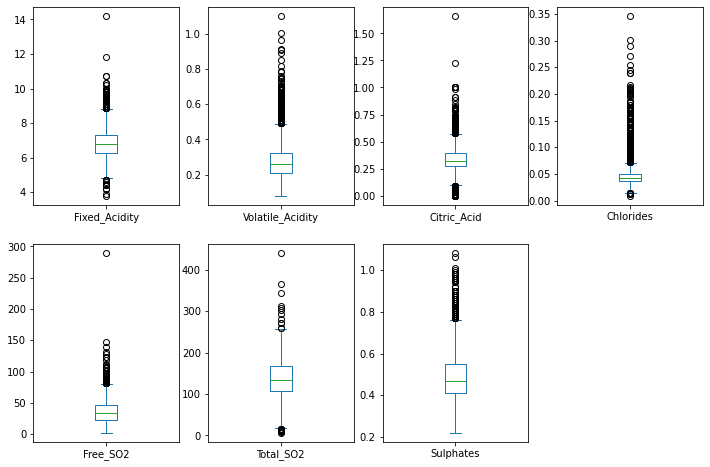

In [7]:
#Display boxplot across all numerical variables to help identify outliers
df_numerics = df[["Fixed_Acidity","Volatile_Acidity","Citric_Acid","Chlorides","Free_SO2","Total_SO2","Sulphates"]]
df_numerics.plot(kind='box',  subplots=True, layout=(2, 4), figsize=(12, 8))
plt.show()

Our group defines outliers as anything above or below 3sd from the mean value. We only consider outliers for numerical variables, as we find that all information stored in the categorical variables will be useful for us. We first examine how many outliers there are for each variable.

In [8]:
def three_sd_range(series):
    mean = series.mean()
    sd = series.std()
    low = mean - 3*sd
    high = mean + 3*sd
    
    return (low, high)

categories = ["Fixed_Acidity","Volatile_Acidity","Citric_Acid","Chlorides","Free_SO2","Total_SO2","Sulphates"]
total = 0
for category in categories:
    
    lower, upper = three_sd_range(df[category])
    outliers = df[(df[category] >= upper) | (df[category] <= lower)]
    total += len(outliers)
    print('No. of outliers in ' + category + ': ' + str(len(outliers)) + '(' + str(round(len(outliers)/len(df),3)*100) + '%)')

print('Total possible number of rows with outliers in any category: ' + str(total) + '(' + str(round(total/len(df),3)*100) + '%)')

No. of outliers in Fixed_Acidity: 44(0.8999999999999999%)
No. of outliers in Volatile_Acidity: 87(1.7999999999999998%)
No. of outliers in Citric_Acid: 85(1.7000000000000002%)
No. of outliers in Chlorides: 102(2.1%)
No. of outliers in Free_SO2: 32(0.7000000000000001%)
No. of outliers in Total_SO2: 11(0.2%)
No. of outliers in Sulphates: 47(1.0%)
Total possible number of rows with outliers in any category: 408(8.3%)


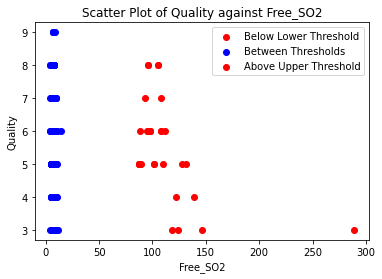

In [9]:
def three_sd_range(series):
    mean = series.mean()
    sd = series.std()
    low = mean - 3*sd
    high = mean + 3*sd
    
    return (low, high)

lower, upper = three_sd_range(df['Free_SO2'])

# Plot points below the lower threshold in red
plt.scatter(df[df['Free_SO2'] < lower]['Free_SO2'], df[df['Free_SO2'] < lower]['Quality'], color='red', label='Below Lower Threshold')

# Plot points between the lower and upper thresholds in blue
plt.scatter(df[(df['Free_SO2'] >= lower) & (df['Free_SO2'] <= upper)]['Fixed_Acidity'], df[(df['Free_SO2'] >= lower) & (df['Free_SO2'] <= upper)]['Quality'], color='blue', label='Between Thresholds')

# Plot points above the upper threshold in red
plt.scatter(df[df['Free_SO2'] > upper]['Free_SO2'], df[df['Free_SO2'] > upper]['Quality'], color='red', label='Above Upper Threshold')

plt.title('Scatter Plot of Quality against Free_SO2')
plt.xlabel('Free_SO2')
plt.ylabel('Quality')

condition = df[(df['Free_SO2']>150)]
df.drop(condition.index , inplace=True)

plt.legend()
plt.show()



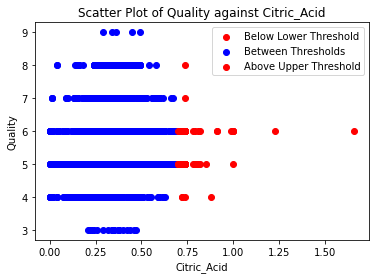

In [10]:
def three_sd_range(series):
    mean = series.mean()
    sd = series.std()
    low = mean - 3*sd
    high = mean + 3*sd
    
    return (low, high)

lower, upper = three_sd_range(df['Citric_Acid'])

# Plot points below the lower threshold in red
plt.scatter(df[df['Citric_Acid'] < lower]['Citric_Acid'], df[df['Citric_Acid'] < lower]['Quality'], color='red', label='Below Lower Threshold')

# Plot points between the lower and upper thresholds in blue
plt.scatter(df[(df['Citric_Acid'] >= lower) & (df['Citric_Acid'] <= upper)]['Citric_Acid'], df[(df['Citric_Acid'] >= lower) & (df['Citric_Acid'] <= upper)]['Quality'], color='blue', label='Between Thresholds')

# Plot points above the upper threshold in red
plt.scatter(df[df['Citric_Acid'] > upper]['Citric_Acid'], df[df['Citric_Acid'] > upper]['Quality'], color='red', label='Above Upper Threshold')

plt.title('Scatter Plot of Quality against Citric_Acid')
plt.xlabel('Citric_Acid')
plt.ylabel('Quality')

plt.legend()
plt.show()

Seeing that the dataset contains close to 5000 entries, for all the features containing outliers, the outliers account for less than 10% of values. Upon also inspecting a few variables to see how outliers affect the quality score, it does not seem that outliers in the variables significantly show any change to the quality of the wine. 

However, seeing that our data set is small, and that we are also unsure how the outliers in the data even come about (whether by erroneous data collection, or naturally occurring outlier data), we have made the decision to retain all outlier data, so that our model will be able to fit outliers in the situation where they come about.

#### <font color='red'>Feedback: From the plots of Quality vs feature, it looks like the far-right lone point in Free_SO2 and the far-right lone point in Citric Acid are too far from the rest of the data points to be simply a statistical variation. I would argue that these 2 points at least you should remove as they are more likely due to error in measurements / sampling.</font> 

**c.** For categorical variables, perform the necessary encoding.

### <font color='red'>Score 5/5 Feedback: Suggest to prefix the encoded columns of Density e.g. "Density >1.00"</font>

In [11]:
#Unique values of Residual_Sugar
df["Residual_Sugar"].unique() 

array(['High', 'Low', 'Moderate'], dtype=object)

In [12]:
#Unique values of Density
df["Density"].unique()

array(['>1.00', '0.99-1.00', '<0.99'], dtype=object)

In [13]:
#Unique values of pH
df["pH"].unique()

array(['Acidic', 'Highly Acidic', 'Neutral'], dtype=object)

### **<font color='green'> [Updated] As seen below, we have updated the encoding as per the feedback provided.</font>**

In [14]:
enc = OrdinalEncoder()

#We encoded based on the feedback [Suggest to prefix the encoded columns of Density e.g. "Density >1.00"]
dummy = pd.get_dummies(df['Density'], prefix='Density', prefix_sep=' ')
df = pd.concat([df,dummy], axis=1)

#We use ordinal encoding for the pH and Residual_Sugar variable as it preserves the order hierarchy to properly reflect the quality of wine 
#Encoding pH variable
enc = OrdinalEncoder(categories=[['Neutral','Acidic','Highly Acidic']])
X = [['Neutral'],['Acidic'],['Highly Acidic']]
enc.fit(X)
df[["pH_enc"]] = enc.transform(df[["pH"]])

#Encoding Residual_Sugar variable
enc = OrdinalEncoder(categories=[['Low','Moderate','High']])
Y = [['Low'],['Moderate'],['High']]
enc.fit(Y)
df[["Residual_Sugar_enc"]] = enc.transform(df[["Residual_Sugar"]])


#We used ordinal encoding for alcohol to directly map the alcohol percentage into a integer. Since the range of alcohol percentages is small, we opted to directly encode the numerical value into the encoded integer instead of creating a function to remove the % string 
#Encoding Alcohol variable
encoding = {"8%":8, "9%":9, "10%":10, "11%":11, "12%":12, "13%":13, "14%":14}
df["Alcohol_enc"] = df["Alcohol"].map(encoding)


In [15]:
df.head()

,ID,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_SO2,Total_SO2,Density,pH,Sulphates,Alcohol,Quality,Density 0.99-1.00,Density <0.99,Density >1.00,pH_enc,Residual_Sugar_enc,Alcohol_enc
0,1,7.0,0.27,0.36,High,0.045,45.0,170.0,>1.00,Acidic,0.45,8%,6,0,0,1,1.0,2.0,8
1,2,6.3,0.30,0.34,Low,0.049,14.0,132.0,0.99-1.00,Acidic,0.49,9%,6,1,0,0,1.0,0.0,9
2,3,8.1,0.28,0.40,Low,0.050,30.0,97.0,0.99-1.00,Acidic,0.44,10%,6,1,0,0,1.0,0.0,10
3,4,7.2,0.23,0.32,Moderate,0.058,47.0,186.0,0.99-1.00,Acidic,0.40,9%,6,1,0,0,1.0,1.0,9
4,5,7.2,0.23,0.32,Moderate,0.058,47.0,186.0,0.99-1.00,Acidic,0.40,9%,6,1,0,0,1.0,1.0,9


The above shows the dataset after we have done all our encoding, that we will use for EDA.

### 3.	Exploratory analysis and visualization [50% of Part I]

**a.** For each variable, provide relevant summary statistics

### <font color='red'>Score 10/10 Feedback: Ok</font> 


In [16]:
#Five-number summary of numerical measures
df[ ["Fixed_Acidity","Volatile_Acidity","Citric_Acid","Chlorides","Free_SO2","Total_SO2","Sulphates","Quality"] ].describe()

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Chlorides,Free_SO2,Total_SO2,Sulphates,Quality
count,4897.000000,4897.00000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000
mean,6.851297,0.27799,0.334154,0.045772,35.256279,137.284460,0.489792,5.878497
std,0.822389,0.10022,0.120976,0.021850,16.617875,43.353935,0.114135,0.884773
min,3.800000,0.08000,0.000000,0.009000,2.000000,6.000000,0.220000,3.000000
25%,6.300000,0.21000,0.270000,0.036000,23.000000,107.000000,0.410000,5.000000
50%,6.800000,0.26000,0.320000,0.043000,34.000000,134.000000,0.470000,6.000000
75%,7.300000,0.32000,0.390000,0.050000,46.000000,167.000000,0.550000,6.000000
max,14.200000,1.10000,1.660000,0.346000,146.500000,366.500000,1.080000,9.000000


In [17]:
def category_summary(df, categories):
    for category in categories:
        print(category)
        print()
        # Count of each category
        category_counts = df[category].value_counts()

        # Frequency of each category
        category_frequency = df[category].value_counts(normalize=True)

        # Mode (most frequent category)
        mode_category = df[category].mode()[0]

        # Unique categories
        unique_categories = df[category].nunique()

        # Relative frequency of each category
        relative_frequency = df[category].value_counts(normalize=True)

        print("Count:")
        print(category_counts)
        print("Frequency:")
        print(category_frequency)
        print("Mode (most frequent category):", mode_category)
        print("Unique categories:", unique_categories)
        print("Relative frequency:")
        print(relative_frequency)
        print()

categories = ['Residual_Sugar','Density','pH','Alcohol']

category_summary(df,categories)

Residual_Sugar

Count:
Low         2911
Moderate    1338
High         648
Name: Residual_Sugar, dtype: int64
Frequency:
Low         0.594446
Moderate    0.273229
High        0.132326
Name: Residual_Sugar, dtype: float64
Mode (most frequent category): Low
Unique categories: 3
Relative frequency:
Low         0.594446
Moderate    0.273229
High        0.132326
Name: Residual_Sugar, dtype: float64

Density

Count:
0.99-1.00    4476
<0.99         330
>1.00          91
Name: Density, dtype: int64
Frequency:
0.99-1.00    0.914029
<0.99        0.067388
>1.00        0.018583
Name: Density, dtype: float64
Mode (most frequent category): 0.99-1.00
Unique categories: 3
Relative frequency:
0.99-1.00    0.914029
<0.99        0.067388
>1.00        0.018583
Name: Density, dtype: float64

pH

Count:
Acidic           4425
Highly Acidic     435
Neutral            37
Name: pH, dtype: int64
Frequency:
Acidic           0.903614
Highly Acidic    0.088830
Neutral          0.007556
Name: pH, dtype: float64
Mode 

We are aware that by adding additional features due to our encoding, we have expanded the size of our dataset. We are also wary of the curse of dimensionality, which is also why we have chosen to use ordinal encoding for some features, and one-hot encoding for others. Nonetheless, we choose to proceed with this form of pre-processing first, and we will tailor the model as necessary once we begin the training stage to see which forms of pre-processing produce the best results.

**b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

### <font color='red'>Score 18/20 Feedback: See below.  </font> 

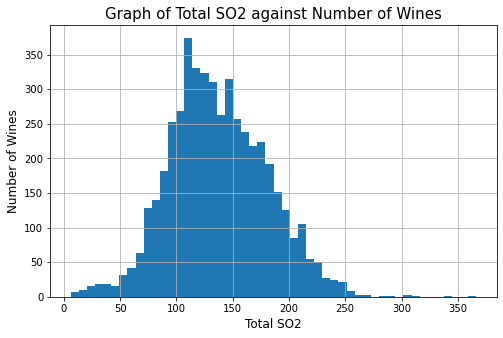

In [18]:
plt.figure(figsize=(8,5))
plt.title("Graph of Total SO2 against Number of Wines", fontsize=15)
plt.xlabel("Total SO2", fontsize=12)
plt.ylabel("Number of Wines", fontsize=12)
df["Total_SO2"].hist(bins=50)    # if bins is not set, default will be applied
plt.show()

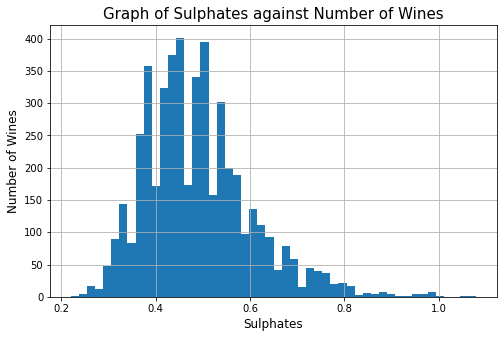

In [19]:
plt.figure(figsize=(8,5))
plt.title("Graph of Sulphates against Number of Wines", fontsize=15)
plt.xlabel("Sulphates", fontsize=12)
plt.ylabel("Number of Wines", fontsize=12)
df["Sulphates"].hist(bins=50)    # if bins is not set, default will be applied
plt.show()

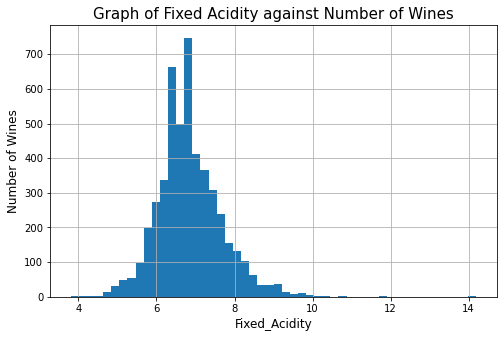

In [20]:
plt.figure(figsize=(8,5))
plt.title("Graph of Fixed Acidity against Number of Wines", fontsize=15)
plt.xlabel("Fixed_Acidity", fontsize=12)
plt.ylabel("Number of Wines", fontsize=12)
df["Fixed_Acidity"].hist(bins=50)    # if bins is not set, default will be applied
plt.show()

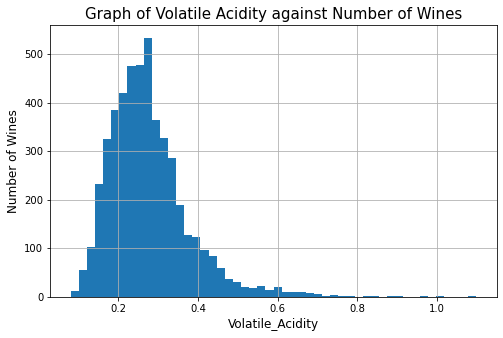

In [21]:
plt.figure(figsize=(8,5))
plt.title("Graph of Volatile Acidity against Number of Wines", fontsize=15)
plt.xlabel("Volatile_Acidity", fontsize=12)
plt.ylabel("Number of Wines", fontsize=12)
df["Volatile_Acidity"].hist(bins=50)    # if bins is not set, default will be applied
plt.show()

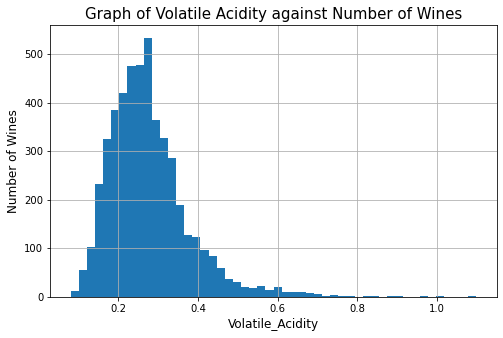

In [22]:
plt.figure(figsize=(8,5))
plt.title("Graph of Volatile Acidity against Number of Wines", fontsize=15)
plt.xlabel("Volatile_Acidity", fontsize=12)
plt.ylabel("Number of Wines", fontsize=12)
df["Volatile_Acidity"].hist(bins=50)    # if bins is not set, default will be applied
plt.show()

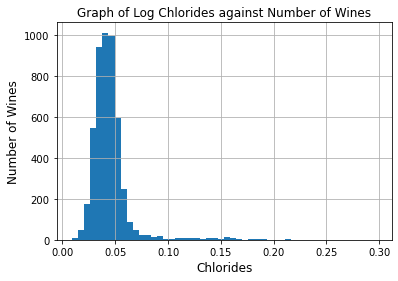

In [23]:
log_chlorides = np.log1p(df[['Chlorides']])
log_chlorides.hist(bins=50)
plt.title('Graph of Log Chlorides against Number of Wines')
plt.xlabel("Chlorides", fontsize=12)
plt.ylabel("Number of Wines", fontsize=12)
plt.show()

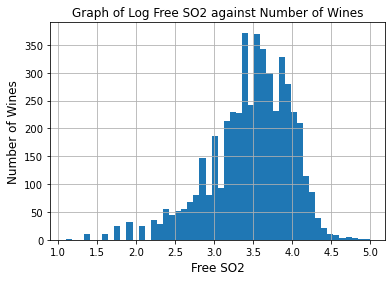

In [24]:
log_freeSO2 = np.log1p(df[['Free_SO2']])
log_freeSO2.hist(bins=50)
plt.title('Graph of Log Free SO2 against Number of Wines')
plt.xlabel("Free SO2", fontsize=12)
plt.ylabel("Number of Wines", fontsize=12)
plt.show()

Majority of the numerical features display a normal-like distribution, with majority of the values distributed around the median. Most of the features have either a right or left skew, with none being perfectly normal. The feature with the least standard deviation is the chlorides feature, where majority of the wines have a value between log0.4 to log0.45 .

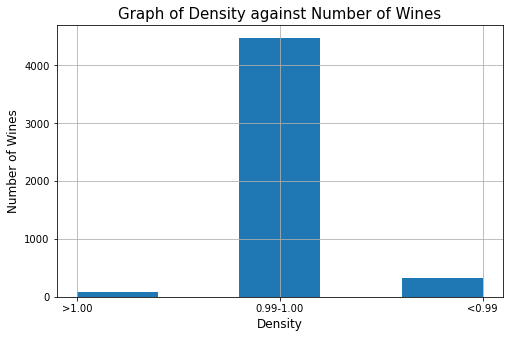

In [25]:
plt.figure(figsize=(8,5))
plt.title("Graph of Density against Number of Wines", fontsize=15)
plt.xlabel("Density", fontsize=12)
plt.ylabel("Number of Wines", fontsize=12)
df["Density"].hist(bins=5)    # if bins is not set, default will be applied
plt.show()

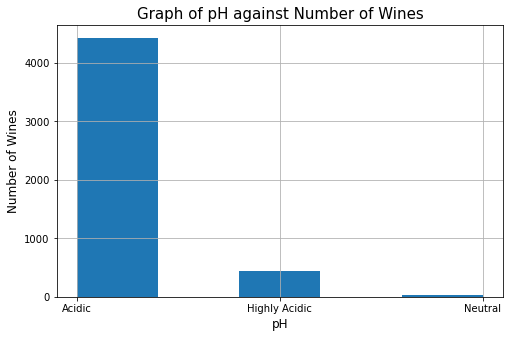

In [26]:
plt.figure(figsize=(8,5))
plt.title("Graph of pH against Number of Wines", fontsize=15)
plt.xlabel("pH", fontsize=12)
plt.ylabel("Number of Wines", fontsize=12)
df["pH"].hist(bins=5)    # if bins is not set, default will be applied
plt.show()

We notice that both features density and pH are unbalanced, in that a huge majority of the values lie in the mode value. Hence, the model may place too much weight on the outlier categories. We are wary of this and will examine the distribution of these features to quality later on.

#### <font color='red'>Feedback: What are  "outlier" categories?  </font> 

##### **<font color='green'>[Updated] "Outlier" categories are categories that have low frequency of occurrence</font>**

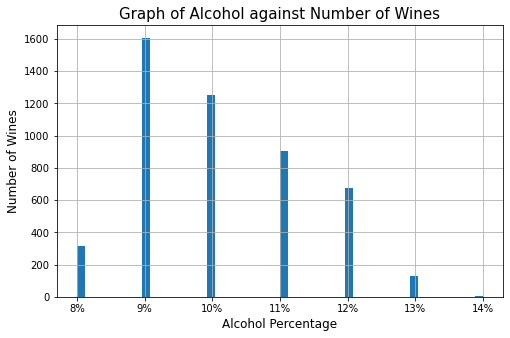

In [27]:
plt.figure(figsize=(8,5))
plt.title("Graph of Alcohol against Number of Wines", fontsize=15)
plt.xlabel("Alcohol Percentage", fontsize=12)
plt.ylabel("Number of Wines", fontsize=12)
df["Alcohol"].hist(bins=50)    # if bins is not set, default will be applied
plt.show()

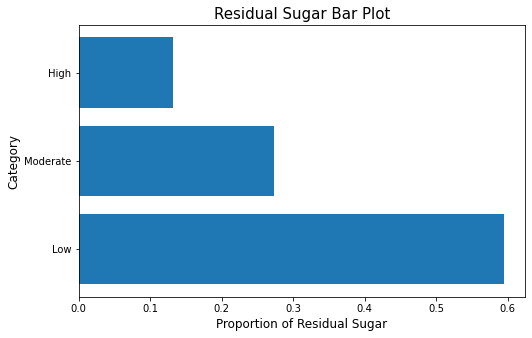

In [28]:
df["Residual_Sugar"] = df["Residual_Sugar"].astype(str)     ## convert the variable to a string so that it is treated categorical
data = df["Residual_Sugar"].value_counts(normalize=True)

xs = data.index
ys = data

plt.figure(figsize=(8,5))
plt.barh(xs, ys)
plt.title("Residual Sugar Bar Plot", fontsize=15)
plt.xlabel("Proportion of Residual Sugar", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.show()

The distributions of residual sugar and alcohol percentage seem to be fairly balanced. Both of them show a downward trend where higher values have a lower distribution.

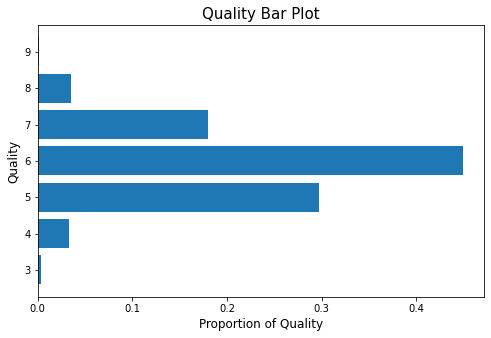

In [29]:
df["Quality"] = df["Quality"].astype(str)     ## convert the variable to a string so that it is treated categorical
data = df["Quality"].value_counts(normalize=True)

data_sorted = data.sort_index()

xs = data_sorted.index
ys = data_sorted
plt.figure(figsize=(8,5))
plt.barh(xs, ys)
plt.title("Quality Bar Plot", fontsize=15)
plt.xlabel("Proportion of Quality", fontsize=12)
plt.ylabel("Quality", fontsize=12)
plt.show()

Our target variable, quality, seems to be the most normally distributed out of all the vairables. Majority of the wines are rated quality 6, with the maximum deviation being quality points from the mode. Hence, the range lies from 3 to 9 as minimum and maximum respectively. We take note of this as it means that our model will only be able to predict a minimum quality score of 3 and a maximum quality score of 9, as these values are categorical, not numerical.

#### <font color='red'>Feedback: Good to note the range of allowed values. Better to state that you <font color='blue'>assume</font> that quality ratings are between 3 and 9, because there could be ratings of 1, 2 and 10, but just that our dataset does not have.  </font> 


**<font color='green'> [Updated] It is indeed an assumption on our part that, based on the data provided, the range of quality scores is between 3-9. </font>**

**c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

### <font color='red'>Score 18/20 Feedback: See below</font> 

In [30]:
df.head()

,ID,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_SO2,Total_SO2,Density,pH,Sulphates,Alcohol,Quality,Density 0.99-1.00,Density <0.99,Density >1.00,pH_enc,Residual_Sugar_enc,Alcohol_enc
0,1,7.0,0.27,0.36,High,0.045,45.0,170.0,>1.00,Acidic,0.45,8%,6,0,0,1,1.0,2.0,8
1,2,6.3,0.30,0.34,Low,0.049,14.0,132.0,0.99-1.00,Acidic,0.49,9%,6,1,0,0,1.0,0.0,9
2,3,8.1,0.28,0.40,Low,0.050,30.0,97.0,0.99-1.00,Acidic,0.44,10%,6,1,0,0,1.0,0.0,10
3,4,7.2,0.23,0.32,Moderate,0.058,47.0,186.0,0.99-1.00,Acidic,0.40,9%,6,1,0,0,1.0,1.0,9
4,5,7.2,0.23,0.32,Moderate,0.058,47.0,186.0,0.99-1.00,Acidic,0.40,9%,6,1,0,0,1.0,1.0,9


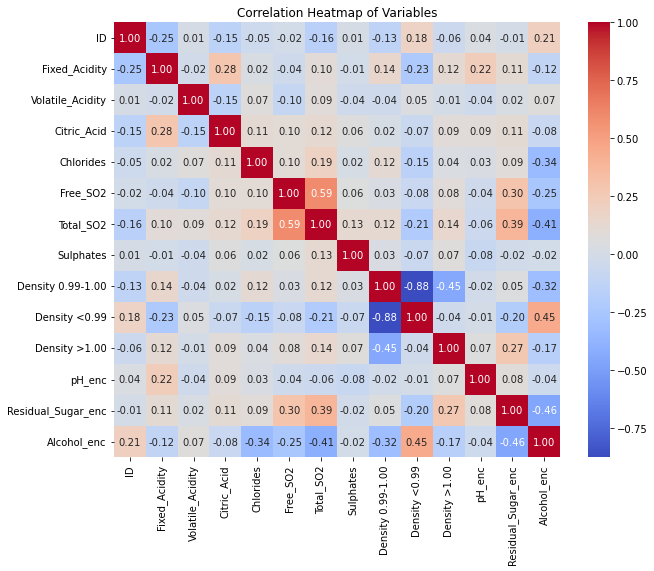

In [31]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Variables')
plt.show()

The above heatmap shows the rough correlations between all the variables, as seen, most variables have a low correlation to each other. <br> We have identified those with show moderately higher correlation, as well as other variables of interest, and plot them out below. We also note that the features denote the amount of a chemical compound in a wine. <br> We also noted that some compounds are represented in different features, such as free SO2 and total SO2, and fixed and volatile acidity. We also plotted these out to see the relationship between these features and their influence on quality. <br> We selected a few different compounds to compare against each other to see if they influenced quality. 
We will focus on the following pairs of variables, and colour them by Quality:
<ul>
<li>Alcohol and Fixed Acidity</li>
<li>Fixed Acidity and pH</li>
<li>Volatile Acidity and Fixed Acidity</li>
<li>Citric Acid and Fixed Acidity</li>
<li>Citric Acid and Chlorides</li>
<li>Free SO2 and Total SO2</li>
</ul>

### Scatter plot of Alcohol and Fixed Acidity coloured by Quality

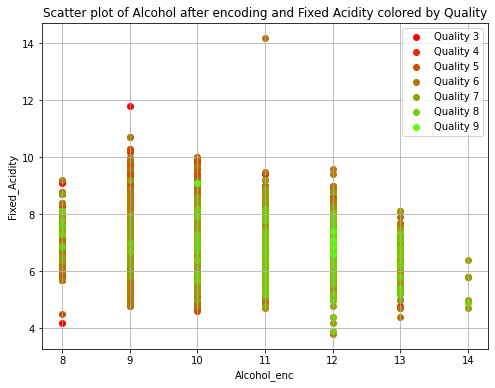

In [32]:
quality_values = {'3': 'FF0000', '4': 'E42900', '5': 'CB5000', '6': 'B17700', '7': '96A000', '8': '79CC00', '9':'57FF00'}

colors = {quality: tuple(int(color[i:i+2], 16)/255 for i in (0, 2, 4)) for quality, color in quality_values.items()}

plt.figure(figsize=(8, 6))
for quality, color in colors.items():
    plt.scatter(df[df['Quality'] == quality]['Alcohol_enc'],
                df[df['Quality'] == quality]['Fixed_Acidity'],
                color=[color],
                label=f'Quality {quality}')

plt.xlabel('Alcohol_enc')
plt.ylabel('Fixed_Acidity')
plt.title('Scatter plot of Alcohol after encoding and Fixed Acidity colored by Quality')
plt.legend()
plt.grid(True)
plt.show()

### Scatter plot of Fixed Acidity and pH encoded coloured by Quality

With our common knowledge, as a substance's pH decreases, it is more acidic. The scatterplot below confirms that as fixed acidity increases, the pH of the wine decreases and becomes more acidic.

#### <font color='red'>It would be better if some research was done on the difference between fixed acidity and pH when it comes to wine ratings. Adding domain knowledge to your analysis would beef up the report.</font> 

##### **<font color='green'> [Updated] As we mentioned above, as the amount of fixed acids increases, the pH of the wine decreases. However, what we failed to include was the observation that the pH level of wines (which will be affected by factors other than fixed acids) does not have as much of an effect on quality as the amount of fixed acids. It appears that the optimal range of Fixed_Acidity for highest quality wines lies between 6-8g/dm3</font>**

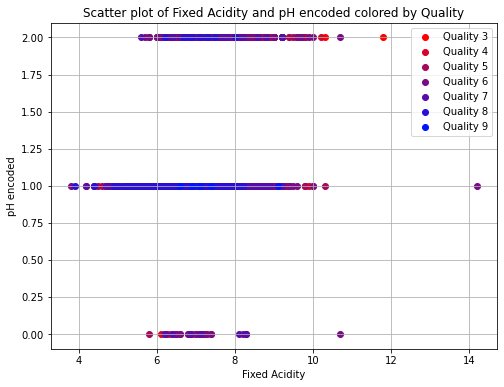

In [33]:
quality_values = {'3': 'FF0000', '4': 'D60529', '5': 'A5085A', '6': '7A0B85', '7': '560da9', '8': '2B0FD4', '9':'0012FF'}

colors = {quality: tuple(int(color[i:i+2], 16)/255 for i in (0, 2, 4)) for quality, color in quality_values.items()}

plt.figure(figsize=(8, 6))
for quality, color in colors.items():
    plt.scatter(df[df['Quality'] == quality]['Fixed_Acidity'],
                df[df['Quality'] == quality]['pH_enc'],
                color=[color],
                label=f'Quality {quality}')

plt.xlabel('Fixed Acidity')
plt.ylabel('pH encoded')
plt.title('Scatter plot of Fixed Acidity and pH encoded colored by Quality')
plt.legend()
plt.grid(True)
plt.show()

### Scatter plot of Volatile Acidity and Fixed Acidity coloured by Quality

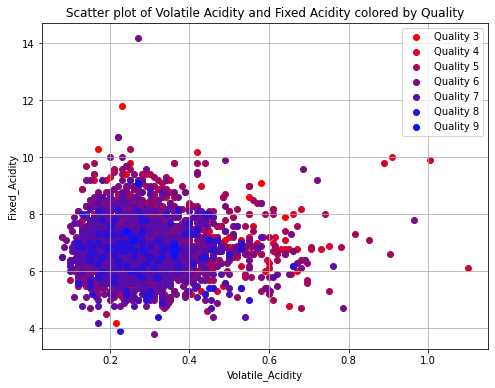

In [34]:
quality_values = {'3': 'FF0000', '4': 'D60529', '5': 'A5085A', '6': '7A0B85', '7': '560da9', '8': '2B0FD4', '9':'0012FF'}

colors = {quality: tuple(int(color[i:i+2], 16)/255 for i in (0, 2, 4)) for quality, color in quality_values.items()}

plt.figure(figsize=(8, 6))
for quality, color in colors.items():
    plt.scatter(df[df['Quality'] == quality]['Volatile_Acidity'],
                df[df['Quality'] == quality]['Fixed_Acidity'],
                color=[color],
                label=f'Quality {quality}')

plt.xlabel('Volatile_Acidity')
plt.ylabel('Fixed_Acidity')
plt.title('Scatter plot of Volatile Acidity and Fixed Acidity colored by Quality')
plt.legend()
plt.grid(True)
plt.show()

#### <font color='red'>Initially your team mentioned that Fixed_Acidity and Volatile_Acidity are "compounds represented in different features". However, this scatterplot (and the coeff matrix) seems to show that the relationship between these 2 features is very weak. Maybe some research into these two characteristics in terms of wine ratings could be added to this report.</font> 

 **<font color='green'> [Updated] From our research, Fixed_Acidity refers to fixed acids which are used to aid in the preservation and maturation process of wines. One example of a fixed acid is Citric Acid. On the other hand, Volatile_Acidity refers to volatile acids which are used as an indicator of wine spoilage. An example of a volatile acid is acetic acid. As such, our initial statement that Fixed_Acidity and Volatile_Acidity are "compounds represented in different features" is incorrect as they refer to different compounds.</font>**

### Scatter plot of Citric Acid and Fixed Acidity coloured by Quality

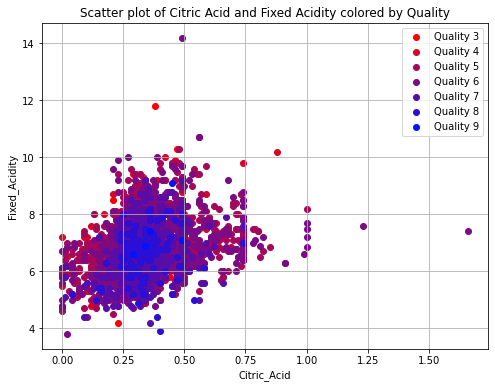

In [35]:
quality_values = {'3': 'FF0000', '4': 'D60529', '5': 'A5085A', '6': '7A0B85', '7': '560da9', '8': '2B0FD4', '9':'0012FF'}

colors = {quality: tuple(int(color[i:i+2], 16)/255 for i in (0, 2, 4)) for quality, color in quality_values.items()}

plt.figure(figsize=(8, 6))
for quality, color in colors.items():
    plt.scatter(df[df['Quality'] == quality]['Citric_Acid'],
                df[df['Quality'] == quality]['Fixed_Acidity'],
                color=[color],
                label=f'Quality {quality}')

plt.xlabel('Citric_Acid')
plt.ylabel('Fixed_Acidity')
plt.title('Scatter plot of Citric Acid and Fixed Acidity colored by Quality')
plt.legend()
plt.grid(True)
plt.show()

### Scatter plot Citric Acid and Chlorides coloured by Quality

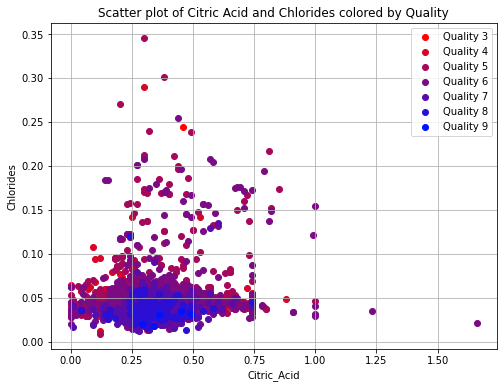

In [36]:
quality_values = {'3': 'FF0000', '4': 'D60529', '5': 'A5085A', '6': '7A0B85', '7': '560da9', '8': '2B0FD4', '9':'0012FF'}

colors = {quality: tuple(int(color[i:i+2], 16)/255 for i in (0, 2, 4)) for quality, color in quality_values.items()}

plt.figure(figsize=(8, 6))
for quality, color in colors.items():
    plt.scatter(df[df['Quality'] == quality]['Citric_Acid'],
                df[df['Quality'] == quality]['Chlorides'],
                color=[color],
                label=f'Quality {quality}')

plt.xlabel('Citric_Acid')
plt.ylabel('Chlorides')
plt.title('Scatter plot of Citric Acid and Chlorides colored by Quality')
plt.legend()
plt.grid(True)
plt.show()

### Scatter plot of Free SO2 and Total SO2 coloured by Quality

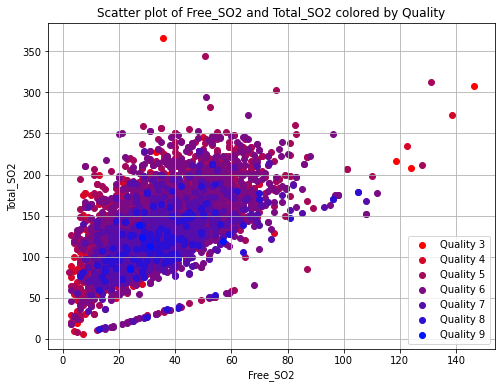

In [37]:
quality_values = {'3': 'FF0000', '4': 'D60529', '5': 'A5085A', '6': '7A0B85', '7': '560da9', '8': '2B0FD4', '9':'0012FF'}

colors = {quality: tuple(int(color[i:i+2], 16)/255 for i in (0, 2, 4)) for quality, color in quality_values.items()}

plt.figure(figsize=(8, 6))
for quality, color in colors.items():
    plt.scatter(df[df['Quality'] == quality]['Free_SO2'],
                df[df['Quality'] == quality]['Total_SO2'],
                color=[color],
                label=f'Quality {quality}')

plt.xlabel('Free_SO2')
plt.ylabel('Total_SO2')
plt.title('Scatter plot of Free_SO2 and Total_SO2 colored by Quality')
plt.legend()
plt.grid(True)
plt.show()

We researched that total sulfur dioxide (SO2) is a sum of bound and free SO2, and free SO2 is important for preventing microbial growth and oxidation. We aimed to see whether the proportion of free SO2 within total SO2 affected the quality of the wine.

<br>

For the graphs above, we picked out variables that we felt were closely related to one another. We also plotted them against the quality score of the wine. 

However, we saw no tangible trend between any of the variables. At the very most, we may observe that the wines with the best quality lie around the median values of the variables, but this may not wholly be attributed to the features as the number of wines with high quality in the dataset is low.

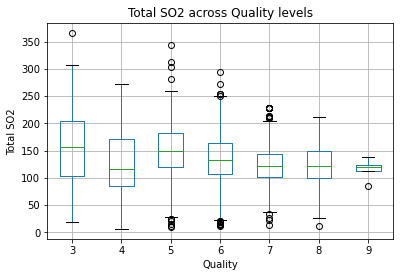

In [38]:
#Box Plot of Total SO2 Across Different Quality Levels
df[['Quality','Total_SO2']].boxplot(by='Quality')
plt.title("Total SO2 across Quality levels")
plt.suptitle("")
plt.xlabel('Quality')
plt.ylabel('Total SO2')
plt.show()

We hypothesised that wines with higher SO2 levels have lower quality. Hence, we plotted the total SO2 in the wine against its quality. It can be seen that there is a very slight, but negligible, downward trend. As such, our hypothesis is likely untrue.

#### <font color='red'>I would say that these box plots show that the higher the quality, the less spread out the "Total SO2" values.</font> 

**<font color='green'> [Updated] Yes, we agree with this feedback</font>**

<br>

We also looked at the relationship of the categorical variables we highlighted above.

In [39]:
pd.crosstab(df["Density"], df["Quality"])

Quality,3,4,5,6,7,8,9
Density,,,,,,,
0.99-1.00,18,159,1399,2024,736,137,3
<0.99,0,4,11,140,138,35,2
>1.00,1,0,47,34,6,3,0


In [40]:
pd.crosstab(df["pH"], df["Quality"])

Quality,3,4,5,6,7,8,9
pH,,,,,,,
Acidic,15,146,1310,1988,802,159,5
Highly Acidic,4,14,136,193,72,16,0
Neutral,0,3,11,17,6,0,0


As can be seen from both density and pH, the different categories do not influence the distribution of quality to a great extent. It is noted however, that having a lower density makes wines have slightly more quality.

The above sums up our insights from our EDA. As can be seen, we note that the variables mostly do not have strong correlation to each other. At most, we do draw the reserved inference that variables that lie around the mean value generally have a higher quality, but we say so reservedly as the data does not strongly suggest this.

In addition to our EDA, to prepare the model for training, we have chosen to take a few steps for data transformation. We decided to normalise all the numerical values in order to ensure the model does not show preference to any one particular variable. We also remove the original pre-encoded categorical variables and just leave them in their encoded forms.

In [41]:
def preprocess_data(df):
    # for numerical columns
    # we normalize using MinMaxScaler to constrain values between 0 and 1

    scaler = MinMaxScaler(feature_range = (0,1))
    df_numeric = ["Fixed_Acidity","Volatile_Acidity","Citric_Acid","Chlorides","Free_SO2","Total_SO2","Sulphates","Alcohol_enc",'pH_enc','Residual_Sugar_enc']

    for col in df_numeric:
        # fit_transform() of scaler can be applied to each column individually
        df[col] = scaler.fit_transform(df[[col]])

    print("---Successfully processed numeric column(s)")
    print(df.head(5))

    # for categorical columns
    # we have handled them through encoding above

    return df

#### <font color='red'>Feedback: Good transformation</font>

In [42]:
# execute preprocess_data()
df = preprocess_data(df)

---Successfully processed numeric column(s)
   ID  Fixed_Acidity  Volatile_Acidity  Citric_Acid Residual_Sugar  Chlorides  \
0   1       0.307692          0.186275     0.216867           High   0.106825   
1   2       0.240385          0.215686     0.204819            Low   0.118694   
2   3       0.413462          0.196078     0.240964            Low   0.121662   
3   4       0.326923          0.147059     0.192771       Moderate   0.145401   
4   5       0.326923          0.147059     0.192771       Moderate   0.145401   

   Free_SO2  Total_SO2    Density      pH  Sulphates Alcohol Quality  \
0  0.297578   0.454924      >1.00  Acidic   0.267442      8%       6   
1  0.083045   0.349515  0.99-1.00  Acidic   0.313953      9%       6   
2  0.193772   0.252427  0.99-1.00  Acidic   0.255814     10%       6   
3  0.311419   0.499307  0.99-1.00  Acidic   0.209302      9%       6   
4  0.311419   0.499307  0.99-1.00  Acidic   0.209302      9%       6   

   Density 0.99-1.00  Density <0.99 

In [43]:
#Drop categorical columns that have been encoded
df.drop(columns=["Density"], inplace=True)
df.drop(columns=["pH"], inplace=True)
df.drop(columns=["Residual_Sugar"], inplace=True)
df.drop(columns=["Alcohol"], inplace=True)

In [44]:
df.head()

,ID,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Chlorides,Free_SO2,Total_SO2,Sulphates,Quality,Density 0.99-1.00,Density <0.99,Density >1.00,pH_enc,Residual_Sugar_enc,Alcohol_enc
0,1,0.307692,0.186275,0.216867,0.106825,0.297578,0.454924,0.267442,6,0,0,1,0.5,1.0,0.000000
1,2,0.240385,0.215686,0.204819,0.118694,0.083045,0.349515,0.313953,6,1,0,0,0.5,0.0,0.166667
2,3,0.413462,0.196078,0.240964,0.121662,0.193772,0.252427,0.255814,6,1,0,0,0.5,0.0,0.333333
3,4,0.326923,0.147059,0.192771,0.145401,0.311419,0.499307,0.209302,6,1,0,0,0.5,0.5,0.166667
4,5,0.326923,0.147059,0.192771,0.145401,0.311419,0.499307,0.209302,6,1,0,0,0.5,0.5,0.166667


Above shows the final dataset to be used for modelling.

## Part II: Modeling [12% of final grade]

### 1. Problem formulation [15% of Part II]

**a.** Formulate one regression problem and one classification based on the dataset, in **no more than 50 words**.

**Regression: Wine collectors want to predict the quality of the wine they are purchasing based on its characteristics to achieve a higher return on investment.**

**Classification: Wine collectors want to know which quality band the wine belongs to so that they will make an informed decision when purchasing/auctioning wines.** 

**b.** State which problem (regression or classification) you would be investigating and why, in **no more than 20 words**.

**Classification problem, because quality of wine is initially a categorical value, and we assume it only ranges from 3-9.** 

**c.** Clearly specify the dependent variable you are predicting, and its significance, in **no more than 20 words**

**The dependent variable we are predicting is the quality of the wine, which is an indicator of its market value.** 

### 2. Model training [30% of Part II]

As part of feature selection, we would like to view the distribution of categorical variables again, without them being encoded. As we have encoded them previously, we read in the dataset again, and we will re-encode and re-transform the data again after we have selected the relevant features.

In [45]:
df = pd.read_csv('wine.csv')
df

,ID,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_SO2,Total_SO2,Density,pH,Sulphates,Alcohol,Quality
0,1,7.0,0.27,0.36,High,0.045,45.0,170.0,>1.00,Acidic,0.45,8%,6
1,2,6.3,0.30,0.34,Low,0.049,14.0,132.0,0.99-1.00,Acidic,0.49,9%,6
2,3,8.1,0.28,0.40,Low,0.050,30.0,97.0,0.99-1.00,Acidic,0.44,10%,6
3,4,7.2,0.23,0.32,Moderate,0.058,47.0,186.0,0.99-1.00,Acidic,0.40,9%,6
4,5,7.2,0.23,0.32,Moderate,0.058,47.0,186.0,0.99-1.00,Acidic,0.40,9%,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,4894,6.2,0.21,0.29,Low,0.039,24.0,92.0,0.99-1.00,Acidic,0.50,11%,6
4894,4895,6.6,0.32,0.36,Moderate,0.047,57.0,168.0,0.99-1.00,Acidic,0.46,9%,5
4895,4896,6.5,0.24,0.19,Low,0.041,30.0,111.0,0.99-1.00,Highly Acidic,0.46,9%,6
4896,4897,5.5,0.29,0.30,Low,0.022,20.0,110.0,<0.99,Acidic,0.38,12%,7


In [46]:
df.Density.fillna(density_mode, inplace=True)
df.Fixed_Acidity.fillna(fixed_acidity_mean, inplace=True)
df.Volatile_Acidity.fillna(volatile_acidity_mean, inplace=True)

**a.** Perform feature selection. For each variable, decide if you want to include it as a feature and provide a justification. You may leverage on your analysis in Part I: EDA and/or perform additional analysis.

In [47]:
#Separating the features based on its type
datatypes = df.dtypes
categorical_features = datatypes[datatypes=="object"].index
numerical_features = datatypes[datatypes!="object"].index

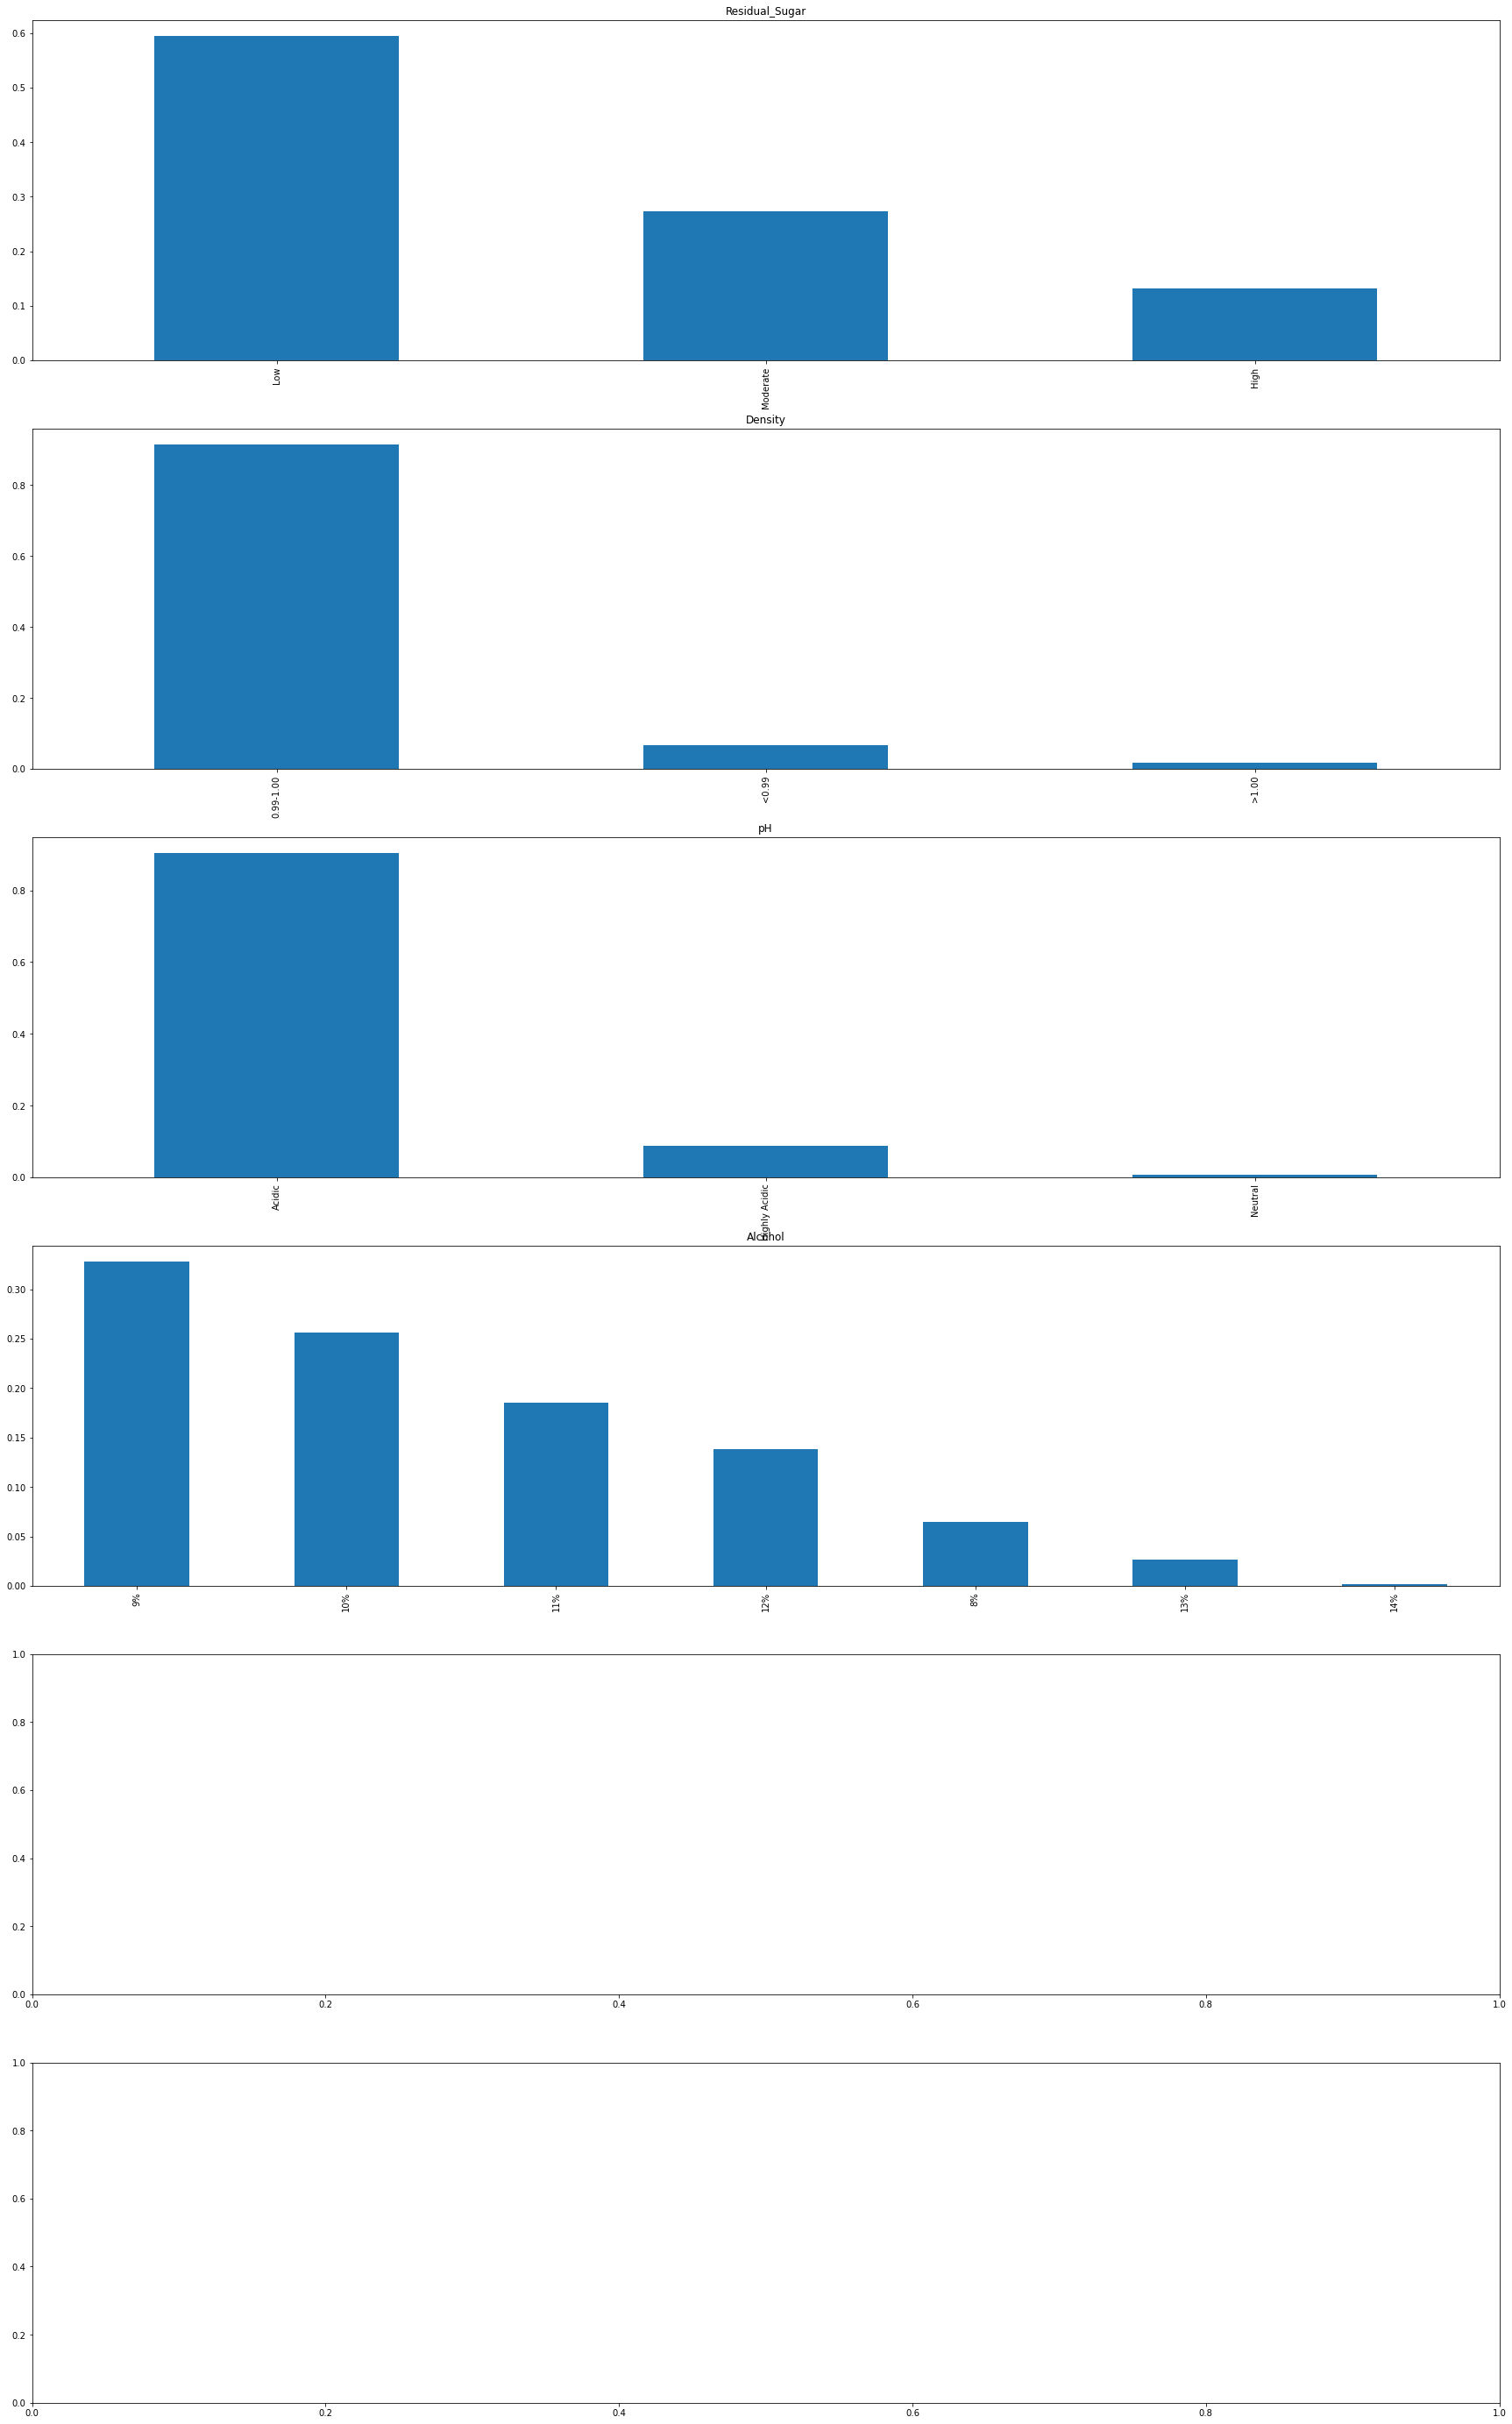

In [48]:
#Categorical features
n = len(categorical_features)

r, c = 6,1
fig, ax = plt.subplots(r, c, figsize=(30,50))

for i in range(n):
    feature = categorical_features[i]
    ax = plt.subplot(r,c,i+1)
    ax.set_title(feature)
    df[feature].value_counts(normalize=True).plot(kind='bar')

plt.show()

In [49]:
# get 'important' categorical features i.e. those with mode having freq < 50%

categorical_important = []

for feature in categorical_features:
    if feature == 'Quality':
        continue
    highest = df[feature].value_counts(normalize=True)[0]
    if highest<0.5:
        categorical_important.append(feature)

print(f"Variables with mode contributing <50% are : {categorical_important}")

Variables with mode contributing <50% are : ['Alcohol']


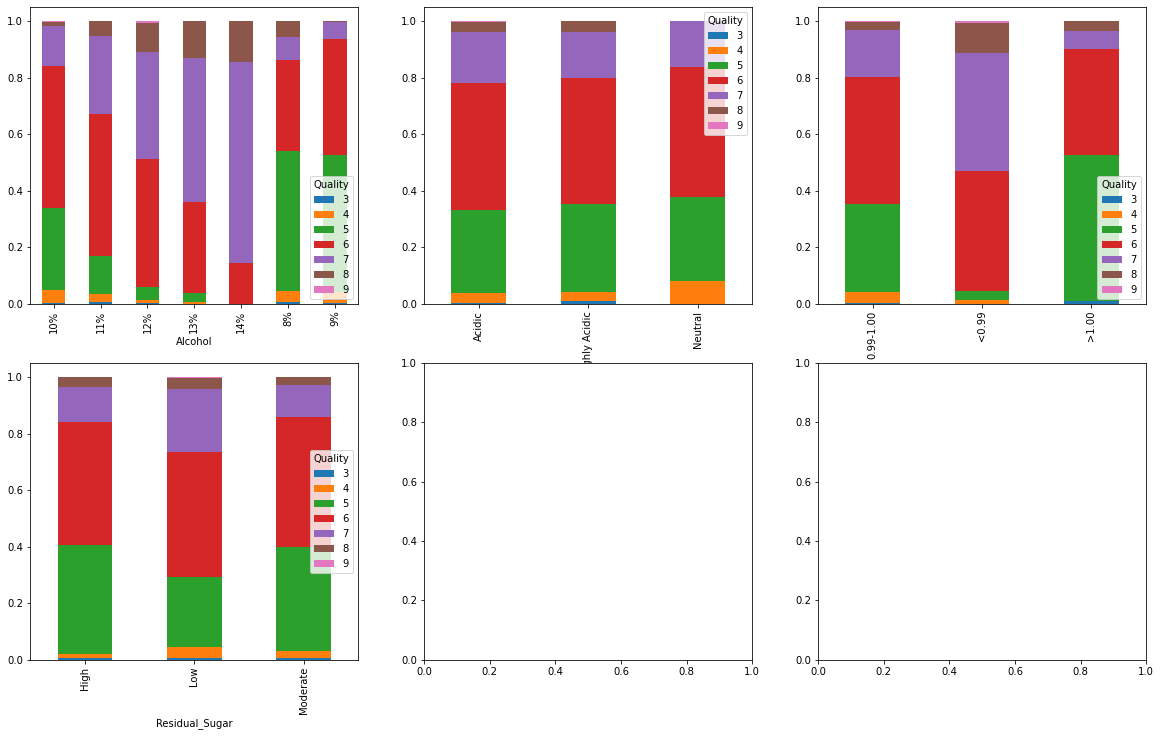

In [50]:
n = len(categorical_features)
r, c = 2,3
fig, ax = plt.subplots(r, c, figsize=(20,12))

for i in range(n):
    feature = categorical_features[::-1][i]
    ax = plt.subplot(r,c,i+1)
    pd.crosstab(df[feature], df["Quality"], normalize="index").plot.bar(stacked=True, ax=ax)

Based on a visual observation we noted the following:
- `Alcohol` = `14%` have a higher proportion of 7 for `Quality` than those with `13%` which in turn has a higher proportion of 7 for `Quality` than those with `12%` which in turn has a higher proportion of 7 for `Quality` than those with `11%`
- For `Density`, those with `<0.99` shows a higher proportion of high quality, i.e. 6 and above, as compared to `>1.00`.

For the other variables, a visual inspection does not reveal any potential relationship to `Quality`

Hence based on an EDA on the categorical variables, we will keep `Alcohol` and `Density`. Furthermore, we would encode the categorical values with a numerical value.  We could do that because `Alcohol` have ordinal meaning as there is a natural order attached to the values. We would use One-Hot Encoding for `Density`, as it is a nominal data and there is more than one category.

In [51]:
#We used ordinal encoding for alcohol to directly map the alcohol percentage into a integer. Since the range of alcohol percentages is small, we opted to directly encode the numerical value into the encoded integer instead of creating a function to remove the % string 
#Encoding Alcohol variable
encoding = {"8%":8, "9%":9, "10%":10, "11%":11, "12%":12, "13%":13, "14%":14}
df["Alcohol_enc"] = df["Alcohol"].map(encoding)

#We encoded based on the feedback [Suggest to prefix the encoded columns of Density e.g. "Density >1.00"]
dummy = pd.get_dummies(df['Density'], prefix='Density', prefix_sep=' ')
df = pd.concat([df,dummy], axis=1)

categorical_features_selected = ["Alcohol_enc", "Density <0.99", "Density >1.00", "Density 0.99-1.00"]

df.head()

,ID,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_SO2,Total_SO2,Density,pH,Sulphates,Alcohol,Quality,Alcohol_enc,Density 0.99-1.00,Density <0.99,Density >1.00
0,1,7.0,0.27,0.36,High,0.045,45.0,170.0,>1.00,Acidic,0.45,8%,6,8,0,0,1
1,2,6.3,0.30,0.34,Low,0.049,14.0,132.0,0.99-1.00,Acidic,0.49,9%,6,9,1,0,0
2,3,8.1,0.28,0.40,Low,0.050,30.0,97.0,0.99-1.00,Acidic,0.44,10%,6,10,1,0,0
3,4,7.2,0.23,0.32,Moderate,0.058,47.0,186.0,0.99-1.00,Acidic,0.40,9%,6,9,1,0,0
4,5,7.2,0.23,0.32,Moderate,0.058,47.0,186.0,0.99-1.00,Acidic,0.40,9%,6,9,1,0,0


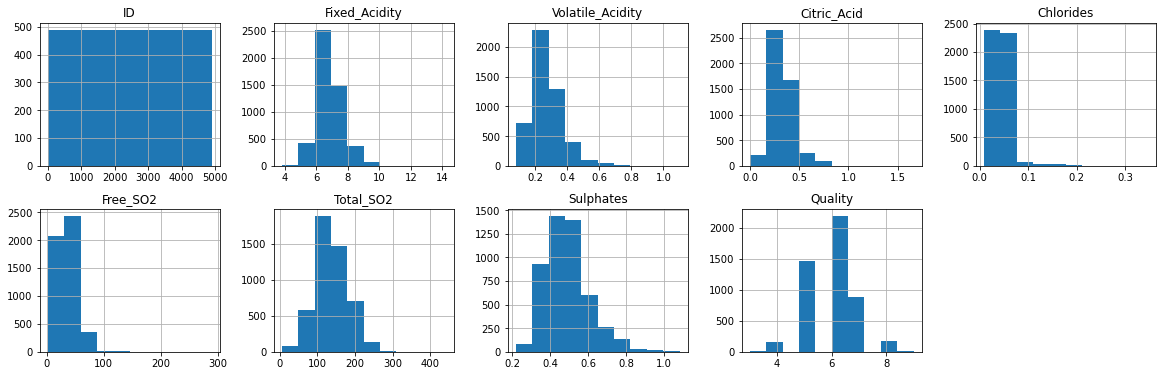

In [52]:
#Numerical features
df[numerical_features].hist(layout=(9,5), figsize=(20,30))

plt.show()

Based on a visual observation we noted the following:
- The variable `ID` is an index, hence it would not have explanatory power


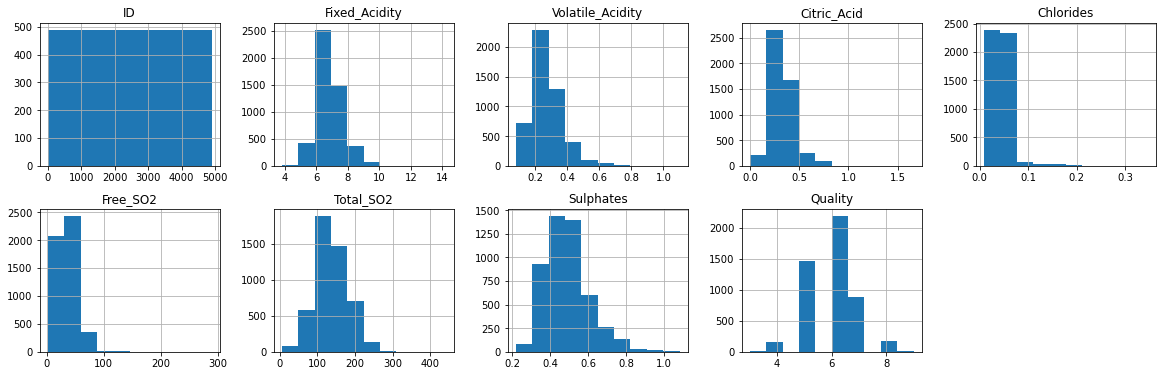

In [53]:
#Numerical features
df[numerical_features].hist(layout=(9,5), figsize=(20,30))

plt.show()

Based on the observations above, we now select a preliminary set of variables for further EDA.  At this stage, we would want to select *interpretable* variables.  In other words, the variables should be meaningful and relatable for a domain expert.  As such our preliminary variables are `Fixed Acidity`,`Volatile Acidity`,`Citric Acid`,`Chlorides`,`Free SO2`,`Total SO2`,`Sulphates`.

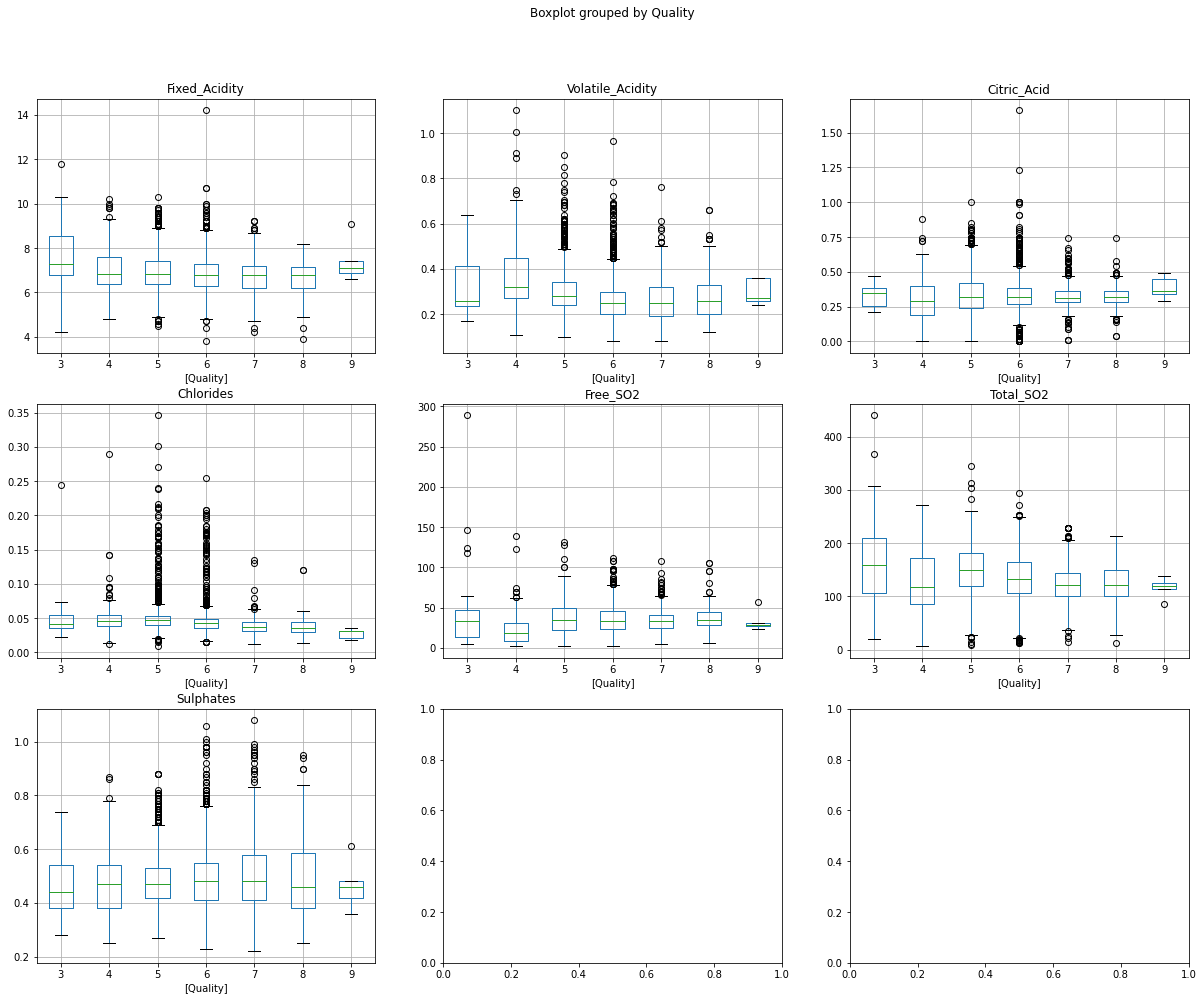

In [54]:
numerical_features_selected = ["Fixed_Acidity","Volatile_Acidity","Citric_Acid","Chlorides","Free_SO2","Total_SO2","Sulphates"]

n = len(numerical_features_selected)

r, c = 3,3
fig, ax = plt.subplots(r, c, figsize=(20,16))

for i in range(n):
    feature = numerical_features_selected[i]
    ax = plt.subplot(r,c,i+1)
    ax.set_title(feature)
    df[['Quality',feature]].boxplot(by='Quality', ax=ax)

plt.show()

The next step is to see if dependent variable `Quality` is correlated with the features. We will do this only visually in this case - if the median values along with the IQR increase or decrease as we move from one class to another class, then we consider that the feature is corrleated to 'Quality'  

Based on the criteria, the selected features are 'Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Chlorides', 'Free SO2', 'Total SO2' and 'Sulphates'.

In [55]:
def preprocess_data(df):
    # for numerical columns
    # we normalize using MinMaxScaler to constrain values between 0 and 1

    scaler = MinMaxScaler(feature_range = (0,1))
    df_numeric = ["Fixed_Acidity","Volatile_Acidity","Citric_Acid","Chlorides","Free_SO2","Total_SO2","Sulphates","Alcohol_enc"]

    for col in df_numeric:
        # fit_transform() of scaler can be applied to each column individually
        df[col] = scaler.fit_transform(df[[col]])

    print("---Successfully processed numeric column(s)")
    print(df.head(5))

    # for categorical columns
    # we have handled them through encoding above

    return df

In [56]:
# execute preprocess_data()
df = preprocess_data(df)

---Successfully processed numeric column(s)
   ID  Fixed_Acidity  Volatile_Acidity  Citric_Acid Residual_Sugar  Chlorides  \
0   1       0.307692          0.186275     0.216867           High   0.106825   
1   2       0.240385          0.215686     0.204819            Low   0.118694   
2   3       0.413462          0.196078     0.240964            Low   0.121662   
3   4       0.326923          0.147059     0.192771       Moderate   0.145401   
4   5       0.326923          0.147059     0.192771       Moderate   0.145401   

   Free_SO2  Total_SO2    Density      pH  Sulphates Alcohol  Quality  \
0  0.149826   0.377880      >1.00  Acidic   0.267442      8%        6   
1  0.041812   0.290323  0.99-1.00  Acidic   0.313953      9%        6   
2  0.097561   0.209677  0.99-1.00  Acidic   0.255814     10%        6   
3  0.156794   0.414747  0.99-1.00  Acidic   0.209302      9%        6   
4  0.156794   0.414747  0.99-1.00  Acidic   0.209302      9%        6   

   Alcohol_enc  Density 0.99-1

In [57]:
features_selected = categorical_features_selected + numerical_features_selected
print(f"updated selected features: {features_selected}")

updated selected features: ['Alcohol_enc', 'Density <0.99', 'Density >1.00', 'Density 0.99-1.00', 'Fixed_Acidity', 'Volatile_Acidity', 'Citric_Acid', 'Chlorides', 'Free_SO2', 'Total_SO2', 'Sulphates']


**b.** Split the dataset into train and test sets. Describe how you split step by step.

In [58]:
### train_test_split

from sklearn.model_selection import train_test_split

X = df[features_selected]
y = df[["Quality"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

To split the data, we import sklearn's train_test_split. We set a random state of 42, and a test size of 0.25. This splits the data records randomly into training and testing batches, according to the seed of the random state to ensure that the same records are chosen for different iterations of testing. The model is then trained on 75% of the data, and tested on the remaining 25%.

**c.** State the model(s) you will train, and explain your choice(s), in **no more than 50 words per model**. You only need to
train one model, but if you do train more models, limit yourself to no more than three---Grading is based on the validity and soundness of your model, rather than the quantity.

We have chosen decision tree classifiers as it is a fairly robust model that is not affected by linearity. We felt that this would be useful for our data as some of the data has been encoded and does not strictly represent quantitative data. 

We also selected the random forest classifier as it is an ensemble method for decision trees, which will likely give us a better score due to the aggregation of results.

We selected SVM as our data is fairly high dimensional, and was slightly more circular in shape for the distribution of some variables.

#### <font color='blue'> For classification, the most commonly used models are Naive Bayes, Logistic Regression, Support Vector Machine, Decision Trees, K-nearest-neighbours. (We need to decide which to use, Lab 3 only shows Naive Bayes and Log regression)</font> 

**Response.** 

**d.** For each model, perform the training, and report the trained parameters and the training scores, if applicable. 

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# decision_tree_model = DecisionTreeClassifier(random_state=28)

# param_grid = {
#     'max_depth': [3,4,5,6,7,8,10, None],  
#     'min_samples_split': [2, 5, 10, 15],  
#     'min_samples_leaf': [1, 2, 4, 8, 10]  
# }

# grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_

# print("Best Parameters:", best_params)

# dt_model = grid_search.best_estimator_

In [61]:
decision_tree_model = DecisionTreeClassifier(    
    max_depth = None,  
    min_samples_split = 2,  
    min_samples_leaf = 1,
    random_state = 28)

decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=28)

In [62]:
from sklearn.ensemble import RandomForestClassifier

# rf_model = RandomForestClassifier(n_estimators = 200, random_state=28)

# param_grid = {
#     'max_depth': [3,4,5,6,7,8,10, None],  
#     'min_samples_split': [2, 5, 10, 15],  
#     'min_samples_leaf': [1, 2, 4, 8, 10]
# }

# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_

# print("Best Parameters:", best_params)

# rf_model = grid_search.best_estimator_

For the RF model, we ran the grid multiple times with different n_estimators instead of including it in the param grid as it took too long to run and required too much computational power. The best scoring result occurred when n_estimators was 200.

In [63]:
rf_model = RandomForestClassifier(
    n_estimators = 200, 
    max_depth = None,
    min_samples_leaf = 1,
    min_samples_split = 2,
    random_state=28
)

rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=28)

In [64]:
from sklearn.svm import SVC

# SVM_model = SVC(kernel='linear', random_state=28)

# param_grid = {
#     'C': [0.1, 1, 10, 100, 150], 
# }

# grid_search = GridSearchCV(estimator=SVM_model, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_

# print("Best Parameters:", best_params)

# SVM_model = grid_search.best_estimator_

In [65]:
SVM_model = SVC(
    kernel = 'rbf',
    C = 1,
    random_state = 28
)

SVM_model.fit(X_train,y_train)

SVC(C=1, random_state=28)

### 3. Model evaluation and selection [30% of Part II]

**a.** For each model, predict the response variable on the test set.

In [69]:
# predict based on test set
y_pred1 = decision_tree_model.predict(X_test)

In [70]:
# predict based on test set
y_pred2 = rf_model.predict(X_test)

In [71]:
# predict based on test set
y_pred3 = SVM_model.predict(X_test)

**Response.** 

**b.** Describe the metric you use to evaluate your model(s). Report the test scores for each model.

In [72]:
from sklearn.metrics import f1_score, accuracy_score

In [73]:
## model 1 evaluation
# compare with ground truth

acc =  accuracy_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1, average='weighted')

print("Decision Tree Evaluation")
print("-----------------")
print(f"Accuracy: {acc:.3f}")
print(f"F1-score: {f1:.3f}")

Decision Tree Evaluation
-----------------
Accuracy: 0.574
F1-score: 0.577


In [74]:
## model 2 evaluation
# compare with ground truth

acc =  accuracy_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2, average='weighted')

print("Model 2 Evaluation")
print("-----------------")
print(f"Accuracy: {acc:.3f}")
print(f"F1-score: {f1:.3f}")

Model 2 Evaluation
-----------------
Accuracy: 0.665
F1-score: 0.656


In [75]:
## model 3 evaluation
# compare with ground truth

acc =  accuracy_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3, average='weighted')

print("Model 3 Evaluation")
print("-----------------")
print(f"Accuracy: {acc:.3f}")
print(f"F1-score: {f1:.3f}")

Model 3 Evaluation
-----------------
Accuracy: 0.513
F1-score: 0.447


For all the models, we used accuracy and F1 score to assess the results of the model. We used accuracy as we wanted to see how many records our model could correctly classify, and used F1 as well as we understood that our quality target variable was normally distributed, with few records at the extremes. Hence, using F1 score would account for this imbalance and give us a better representation.

**Response.** 

**c.** If you trained more than one model, identify the final model you would choose for the prediction task, and explain your choice, **in no more than 50 words**.

Based on the evaluation metrics on the test set for the different models, we would select the model with the highest accuracy and F1 score. In our case here, the evaluation scores of `Random Forest` are the best .

### 4. Findings and conclusion [20% of Part II]

**a.** Interpret what your model is implying, and summarize any insight you have drawn from the project. Explain if it is consistent with intuition, and if not, provide a plausible justification. Limit your entire response to **50 words**.

In [ ]:
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features_selected, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
9,Total_SO2,0.141890
5,Volatile_Acidity,0.138311
8,Free_SO2,0.136636
7,Chlorides,0.126436
10,Sulphates,0.122556
6,Citric_Acid,0.121635
4,Fixed_Acidity,0.116925
0,Alcohol_enc,0.081320
1,Density <0.99,0.006134
3,Density 0.99-1.00,0.005952


Our model implies that it is difficult to accurately predict the quality of wine from measures of its chemical components, which is in line with our intuition. It is likely that there are more important factors such as its vineyard or age that might matter more.

**b.** Share any lesson you have learned from the project, in **no more than 50 words**.



**Response.** 

Through this project, we learnt the importance of correlating domain knowledge for greater context when generating insights into the dataset at hand as certain relationships are understood better with the addition of domain-specific context.

### 5. Non-technical protocol [5% of Part II]

**a.** Describe the detailed contribution of each team member, including both the tangible (e.g., implementation, testing, writing) and intangible (e.g., generating ideas, planning, leadership) efforts.

|Team member|Contribution|
|---|---|
|CHONG SHIH RUI ZACHARY| Wrote first draft of Part I (1. Overview of dataset, 2. Data pre-processing), Part II (1. Problem formulation, 3. Model evaluation and selection, 5. Non-technical protocol)| 
||Created scatter plot, boxplot and crosstab to conduct bivariate analysis|
||Implemented preprocessing function to normalize numerical columns|
|YANG ZHONG HNG REUBEN| Wrote code to deal with outliers|
||Reviewed and edited code |
||Performed bivariate analysis |
||Lessons learnt and references |
|KEAGAN PAUL POULOSE| Reviewed code and provided advice for which columns to ordinal encode, and which columns to label encode  | 
||Wrote justifications for all decisions and insights gained from all EDA graphs|
||Delegated work for Project Part 2| 
||Selected, constructed and hyperparameter tuned all models| 
|LUCAS SONG KANGZHENG| Generated graphs for the different variables in EDA |
|| Generated graph for bivariate analysis | 
|Entire Group| Discussed criteria for features to select, and selected features| 
||Discussed direction for regression/logistic problem| 
||Edited and fine tuned report|  

**b.** List any references and sources you have cited.

**Response.** 
<ol>
<li>https://www.sciencedirect.com/topics/food-science/wine-quality#:~:text=.%2C%202005).-,Wine%20quality%2C%20in%20terms%20of%20sensory%20characteristics%2C%20is%20normally%20a,properties%20perceived%20by%20the%20senses</li>
<li>https://www.awri.com.au/wp-content/uploads/2018/03/s1982.pdf</li>
<li>https://terroirreview.com/2023/02/23/acidity-in-wine/#:~:text=Wine's%20Fixed%20Acids&text=They%20are%20not%20volatile%2C%20so,and%20helping%20it%20age%20well.</li>
<li>https://www.scielo.br/j/cta/a/HQsrPrPMNZYgRzSKtrjHyHh/?format=pdf#:~:text=Wine%20contains%20from%202%20to,2003%3B%20Maltman%2C%202013.</li>
</ol>
